# ST115 Managing and visualising data

## Workshop 4: Data visualisation in Python

### 2023/24 Winter Term

In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
# to suppress seaborn warning about tight_layout
import warnings
warnings.filterwarnings("ignore") 

## Plan

Plotting data with
* `Matplotlib`
* `Seaborn`
* `Pandas`

Depending on what you want to do (e.g. what plots you want to create, or what kind of manipulation on the plots you want to do), you may find it easier to do so via one library than the others.

## Recap

* Distribution of univariate variables
    * Categorical
        * Bar chart
        * Pie chart
    * Numerical
        * Histogram and density plot
        * Boxplot and violin plot
* Multivariate variables
    * Categorical vs categorical
        * Side-by-side bar chart
    * Numerical vs categorical
        * Overlaying histogram / density plot
        * Side-by-side histogram / density plot / boxplot / violin plot
    * Numerical vs numerical
        * Scatter plot
        * Hex plot and contour plot
* Time series
    * Line plot

# Creating graphs in Python

## Data

We will illustrate how we can create simple plots in Python by the titanic dataset, the coronavirus dataset and the auto dataset that we have seen before:

* Titanic dataset:

In [3]:
import pandas as pd
# here we only use a selection of attributes
titanic = pd.read_csv('data/titanic.csv', usecols=['Survived', 'Pclass', 'Sex', 'Age'])
titanic['Survived'] = pd.Categorical.from_codes(titanic.Survived, 
                                                ['not survived', 'survived'])
titanic['Sex'] = titanic['Sex'].astype('category') 
titanic['Pclass'] = pd.Categorical(titanic['Pclass'], ordered=True) # ordinal

In [4]:
titanic.head()

,Survived,Pclass,Sex,Age
0,not survived,3,male,22.0
1,survived,1,female,38.0
2,survived,3,female,26.0
3,survived,1,female,35.0
4,not survived,3,male,35.0


## Data: UK coronavirus cases and deaths

In [5]:
cases = pd.read_csv('data/cases.csv', usecols=['date', 'newCasesBySpecimenDate'], 
                    parse_dates=['date'], index_col='date', dayfirst=True)
deaths = pd.read_csv('data/deaths.csv', usecols=['date', 'newDeaths28DaysByDeathDate'], 
                     parse_dates=['date'], index_col='date', dayfirst=True)
covid = cases.join(deaths).dropna().astype('int').sort_index()
covid.columns = ['cases', 'deaths']

In [6]:
covid.head()

,cases,deaths
date,,
2020-03-02,42,1
2020-03-03,58,2
2020-03-04,56,0
2020-03-05,49,3
2020-03-06,83,0


## Data: auto dataset

In [7]:
auto = pd.read_csv('data/auto-mpg.csv')
auto['origin'] = auto['origin'].astype('category')

In [8]:
auto.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
14,24.0,4,113.0,95,2372,15.0,70,3,toyota corona mark ii
57,24.0,4,113.0,95,2278,15.5,72,3,toyota corona hardtop
358,31.6,4,120.0,74,2635,18.3,81,3,mazda 626
257,19.4,6,232.0,90,3210,17.2,78,1,amc concord
111,18.0,3,70.0,90,2124,13.5,73,3,maxda rx3


## `Matplotlib`

Matplotlib is a plotting library for the Python programming language. Most of the Matplotlib utilities are under the `pyplot` submodule.
* `matplotlib.pyplot` provides MATLAB-like plotting
* The module is usually imported in the following way:

In [9]:
import matplotlib.pyplot as plt

## `Matplotlib` (continue)

* If you have not yet installed `matplotlib`, please follow the instruction [here](https://matplotlib.org/stable/index.html#installation)
* The version of matplotlib used today is:

In [10]:
import matplotlib
matplotlib.__version__

'3.8.0'

In [11]:
# Set the default figsize to ensure plots can be fitted in one slide
matplotlib.rcParams['figure.figsize'] = (4, 2.5)
# Set style to colour blind friendly
plt.style.use('seaborn-v0_8-colorblind') 

## `matplotlib`: summary

* Distribution of univariate variables
    * Categorical
        * Bar chart: `plt.bar()`
        * Pie chart: `plt.pie()`
    * Numerical
        * Histogram plot: `plt.hist()`
        * Boxplot: `plt.boxplot()`
        * Violin plot: `plt.violinplot()`
* Multivariate variables
    * Numerical vs numerical
        * Scatter plot: `plt.scatter()`
        * Hex plot: `plt.hexbin()`
* Time series
    * Line plot: `plt.plot()`

## `matplotlib`: How about the other plots?

It is more convenient to generate them using other libraries. For example:
* Density plot: `seaborn`
* Comparing distributions:
    * Side-by-side or stacked bar chart: `Pandas`
    * Side-by-side boxplot or violin plot: `seaborn` and `Pandas`

We will demonstrate how to create them later in the workshop.

## Distribution for categorical variable: Bar chart

To create a bar chart, we can use [`plt.bar()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html) and provide 2 sequences, one to specify the category (`x`) and another one for the frequency (`height`). 
* Example (Number of survival of Titanic passengers):

Survived
not survived    545
survived        342
Name: count, dtype: int64


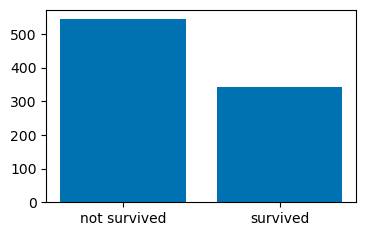

In [15]:
survive_count = titanic.value_counts('Survived')
print(survive_count) #have to manually print the values we get to determine the correct size of the plot and size of bars, etc. --> NOT needed for seaborn though...
plt.bar(x=survive_count.index, height=survive_count.values);

!!Note!!
* you need to count the occurrences from the `DataFrame` by yourself
* `;` at the end of the code is used to prevent output being printed

## Distribution for categorical variable: Pie chart

To create a pie chart, we can use [`plt.pie()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pie.html) and provide 2 sequences, one to specify the frequency (`x`) and another one for the category (`labels`). 
* Example (Number of survival of Titanic passengers):

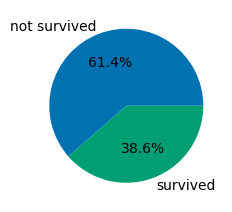

In [13]:
plt.pie(x=survive_count.values, labels=survive_count.index, 
        autopct='%.1f%%'); # show x.x%

## Distribution for quantitative variable: Histogram

To create a histogram, we can use [`plt.hist()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html) and provide a sequence to visualise the distribution. 
* Example (Age of Titanic's passengers):

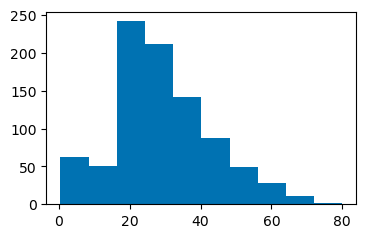

In [14]:
plt.hist(x=titanic['Age']);

## Histogram: relative frequency

To normalise the histogram, provide an additional argument `density=True`. 

* Example (Age of Titanic's passengers):

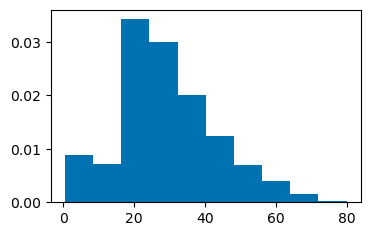

In [15]:
plt.hist(x=titanic['Age'], density=True);

## Histogram: Number of bins

You can control the number and the width of the bins by providing an additional argument `bins`. For example:
* Controlling the number of bins:

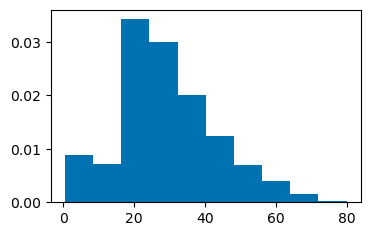

In [18]:
plt.hist(x=titanic['Age'], density=True, bins=10);

## Histogram: Number of bins (continue)

* Defining the bins directly:

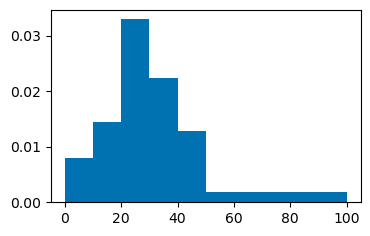

In [19]:
plt.hist(x=titanic['Age'], density=True, bins=[0, 1, 10, 20, 30, 40, 50, 100]);

## Overlaying histogram

You can draw multiple plots in a same figure by calling plotting functions multiple times. 
* Example (Age of Titanic's passengers based on different genders):

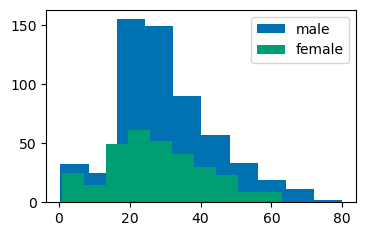

In [21]:
plt.hist(x=titanic.loc[titanic.Sex == 'male', 'Age'], label='male')
plt.hist(x=titanic.loc[titanic.Sex == 'female', 'Age'], label='female')
#notice that we plot the 'same function' (in effect) twice, so we end up with the hists in the same plot
# NOTE: label gives the name to each histogram and allows for the creation of the label
plt.legend(); #don't want the output outside the graph

[`plt.legend()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html) is used to place the legend in the plot to show which plot is for which category.

## Parts of a `Figure`

<center><img src="figs/anatomy.png" width="450"></center>

## Labelling plots

Use [`plt.title()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.title.html), [`plt.xlabel()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xlabel.html), [`plt.ylabel()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.ylabel.html) to add/change the title, and labels for x and y axis:

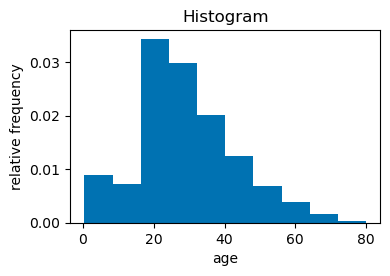

In [19]:
plt.hist(x=titanic['Age'], density=True)
plt.title('Histogram')
plt.xlabel('age')
plt.ylabel('relative frequency');

## Axis ticks and limits

Use [`plt.xlim()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xlim.html), [`plt.ylim()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.ylim.html), [`plt.xticks()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xticks.html) and [`plt.yticks()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.yticks.html) to specify how to format the x and y-axis. For example:

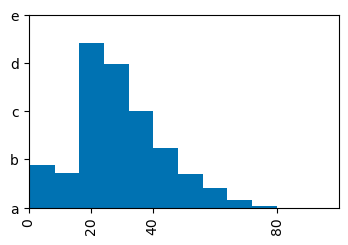

In [27]:
#for illustrative purpose only
import numpy as np
plt.hist(x=titanic['Age'], density=True)
plt.xlim(0, 100) # x limit set to 0 to 100
plt.xticks([0, 20, 40, 80], rotation=90)
plt.yticks(np.linspace(0, 0.04, 5), labels=['a', 'b', 'c', 'd', 'e']);

## Customise your plot

We can customise your plot by providing some additional arguments like `color`, `alpha`, etc. For example:

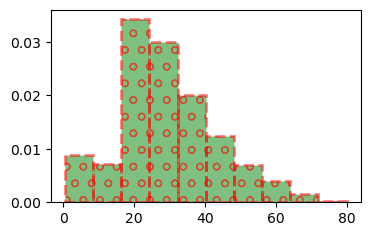

In [28]:
plt.hist(x=titanic['Age'], density=True, color='green', alpha=0.5, edgecolor='red', 
         linestyle = '--', linewidth=2, hatch='o'); # do you remember what alpha is? --> transparency

Try to change them to different values and see how the plot varies. Also, see [here](https://matplotlib.org/stable/tutorials/intermediate/artists.html#customizing-your-objects) to learn more.

## Distribution for numerical variable: Box plot

We can use [`plt.boxplot()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html) to create a box plot.

* Example (Age of Titanic's passengers):

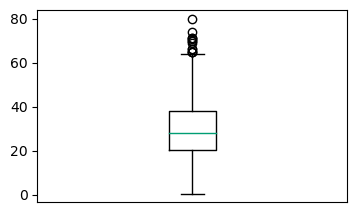

In [22]:
plt.boxplot(x=titanic['Age'])
plt.xticks([]); # remove x ticks

## Distribution for numerical variable: Violin plot

We can use [`plt.violinplot()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.violinplot.html) to create a violin plot.
* Example (Age of Titanic's passengers):

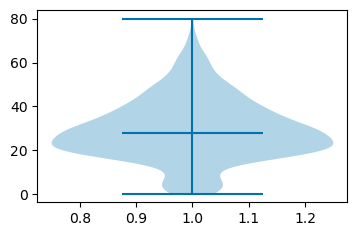

In [23]:
plt.violinplot(dataset=titanic['Age'], showmedians=True);

## Relations for a pair of quantitative variables: Scatter plot

To create a scatter plot, we can use [`plt.scatter()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) and provide 2 sequences that we want to see the relations between them. 
* Example (Displacement vs mpg from the auto dataset):

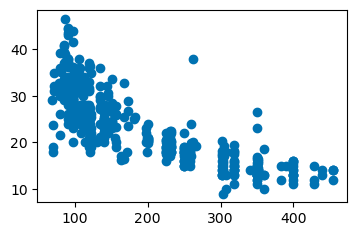

In [24]:
plt.scatter(x=auto.displacement, y=auto.mpg);

## Scatter plot: More variables

Provide an additional argument `s` to control the size, and `c` to control the colour of the markers. 

* Example (Displacement vs mpg from the auto dataset):

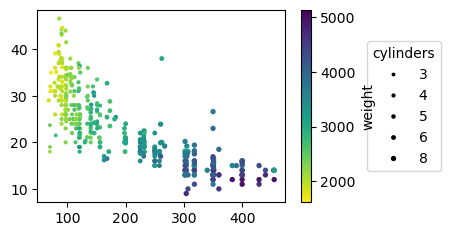

In [29]:
fig, ax = plt.subplots()
g = plt.scatter(x=auto.displacement, y=auto.mpg, c=auto.weight, s=auto.cylinders, #c = colour, s = size
                cmap='viridis_r') # cmap for colour map. We will talk about it next week
cb = fig.colorbar(g, ax=ax); cb.set_label('weight') # add colour bar
# add a legend for sizes, and adjust the location of the legend
plt.legend(*g.legend_elements("sizes"), loc='center left', bbox_to_anchor=(1.3, 0.5),
           title="cylinders");

## Hex plot

Use [`plt.hexbin()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hexbin.html) to create a hex plot.
* Example (Displacement vs mpg from the auto dataset):

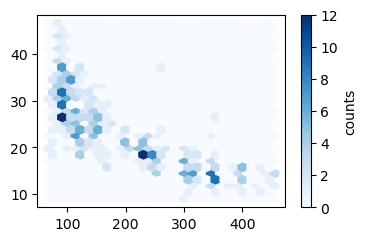

In [30]:
fig, ax = plt.subplots()
hb = ax.hexbin(x=auto.displacement, y=auto.mpg, gridsize=25, cmap='Blues') #hex plot = 2d histogram, where gridsize is how we group the data together
# ... similar to bins in histogram
cb = fig.colorbar(hb, ax=ax); cb.set_label('counts');

## Trend for a quantitative variable: line plot

We can use [`plt.plot()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html) to create a line plot.
* Example (Number of coronavirus cases and deaths):

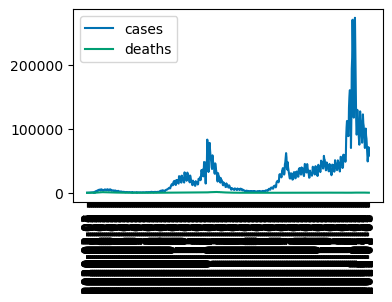

In [31]:
plt.plot(covid.index, covid['cases'], label='cases')
plt.plot(covid.index, covid['deaths'], label='deaths')
plt.xticks(rotation=90); plt.legend();

#superposition = two plots on same graph
#juxtaposition = separate plots

## Plotting multiple subplots in on figure

Use [`plt.subplots()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html) and provide the number of rows (`nrows`) and columns (`ncols`) of plots to create multiple subplots. For example:

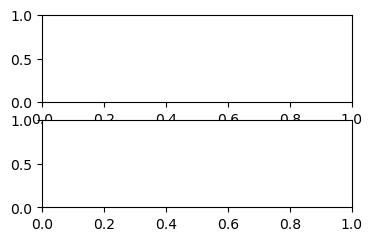

In [28]:
fig, ax = plt.subplots(nrows=2)

In [29]:
ax

array([<Axes: >, <Axes: >], dtype=object)

We provided 2 rows, so there are now 2 axes for ax

## Plotting multiple subplots in on figure (continue)

To plot on the subplots, use indexing on `ax` returned from `plt.subplots()` to plot on the corresponding subplots. 
* For example, below `ax[0]` is for the left subplot and `ax[1]` is for the right subplot:

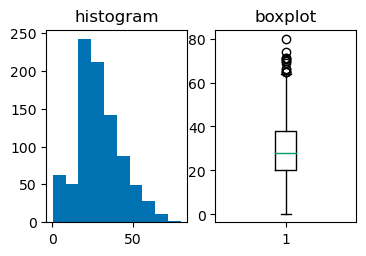

In [30]:
fig, ax = plt.subplots(ncols=2)
ax[0].hist(titanic['Age'])
ax[0].set_title('histogram')
ax[1].boxplot(titanic['Age'])
ax[1].set_title('boxplot');

Note to set the properties of the subplot, now we use `sex_xxxx()` instead of `xxxx()`.

## Plotting multiple subplots in on figure (continue)

Another example:

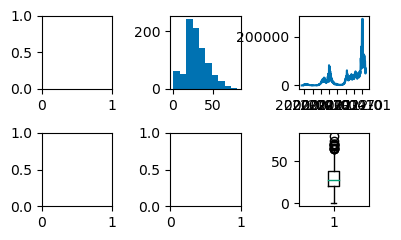

In [31]:
fig, ax = plt.subplots(nrows=2, ncols=3)
fig.tight_layout() # this adjusts the padding between and around subplots
ax[0,1].hist(titanic['Age'])
ax[1,2].boxplot(titanic['Age'])
ax[0,2].plot(covid['cases']);

Notice here `ax` is 2x3 matrix and you can use matrix-like notation to access the corresponding subplot.

## Controlling figure size

Provide an additional argument `figsize` to `plt.subplots` to set the figure size. For example:

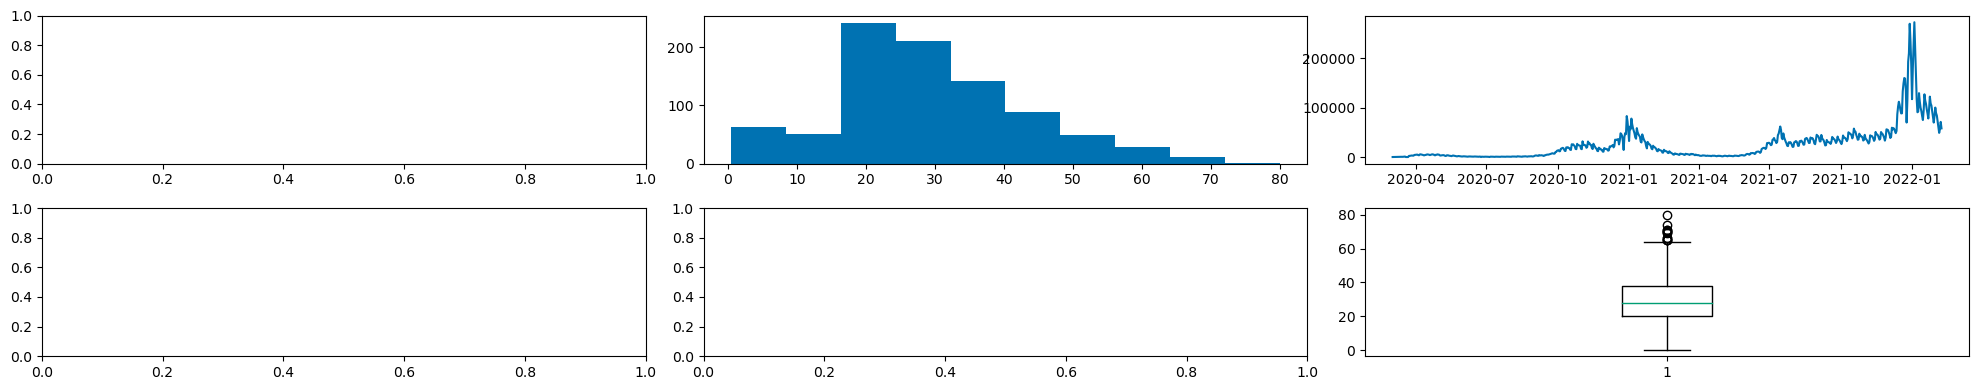

In [32]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(20,4))
fig.tight_layout() # this adjusts the padding between and around subplots
ax[0,1].hist(titanic['Age'])
ax[1,2].boxplot(titanic['Age'])
ax[0,2].plot(covid['cases']);

## Activity 4.1

1. Create 2x1 subplots to show a line plot for the number of cases and another one for the number of deaths. Please do the following:
    * Make sure they share the same x-axis for easy comparison
        * Hint: Provide the argument `sharex=True` to [`plt.subplots()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html)
    * Add the y label to indicate what each subplot is showing (cases? deaths?)
2. On the next page, you are provided code using matplotlib to create a side-by-side boxplot. What do you think about the convenience of creating such a plot?
3. Create 2x2 subplots to show 4 histograms of age with different number of bin widths. Please set the titles of each subplot with the information about the number of bins

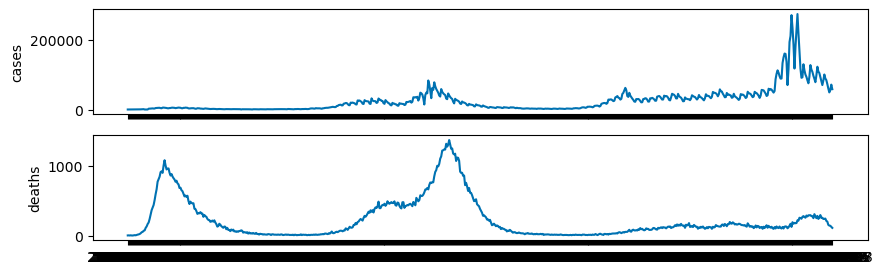

In [39]:
"""
_, ax = plt.subplots(1, 2, figsize=(15, 3), sharex=True)
ax[0].plot(covid.index, covid['cases'], label='cases')
ax[1].plot(covid.index, covid['deaths'], label='deaths')
ax[0].set_ylabel("Cases")
ax[1].set_ylabel("Deaths")
plt.xticks(rotation=90); 
plt.legend();
"""
fig,ax = plt.subplots(nrows=2, sharex = True, figsize = (10,3)) #figsize means that the labels are less compressed, as the whole graph is stretched
ax[0].plot(covid.cases)
ax[0].set_ylabel("cases")
ax[1].plot(covid.deaths)
ax[1].set_ylabel("deaths");

Text(0.5, 1.0, '# bins = 3')

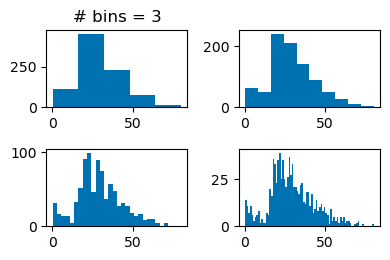

In [53]:
fig, ax = plt.subplots(nrows = 2, ncols = 2)
ax[0,0].hist(titanic["Age"], bins = 5)
ax[0,1].hist(titanic["Age"], bins = 10)
ax[1,0].hist(titanic["Age"], bins = 30)
ax[1,1].hist(titanic["Age"], bins = 80)
plt.tight_layout()
ax[0,0].set_title("# bins = 3")

## Activity 4.1.2: Using matplotlib to create side by side boxplot

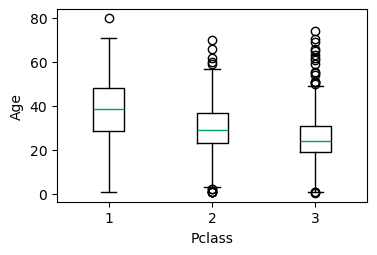

In [40]:
plt.boxplot([titanic.loc[titanic.Pclass == i, 'Age'] for i in range(1, 4)])
plt.xlabel('Pclass')
plt.ylabel('Age');

Source: [Box plot demo](https://matplotlib.org/3.1.1/gallery/pyplots/boxplot_demo_pyplot.html#sphx-glr-gallery-pyplots-boxplot-demo-pyplot-py)

## `matplotlib` takeaways

* Provide the basics, including how to set different properties of plots
* Some plots are easier to be created using some other libraries, as we will soon see

Most of the key properties are listed above, but additonal info will be given below (complete after workshop):

# Seaborn

## `Seaborn`

Seaborn is a Python data visualization library based on `matplotlib`.
* It provides some additional types of plots, and helps with creating more attractive and informative statistical graphics
* The module is usually imported in the following way:

In [56]:
import seaborn as sns

In [57]:
sns.__version__ # seaborn version

'0.12.2'

* We will also use the following style (see [here](https://seaborn.pydata.org/generated/seaborn.set_style.html) for more details):

In [58]:
sns.set_style("darkgrid")

## `seaborn`: summary

* Distribution
    * `sns.countplot()` for bar chart to show counts
    * `sns.displot()` for histogram and density plot
* Compare distributions
    * `sns.catplot()` for side-by-side bar chart, box plot and violin plot --> categorised by size of plots above all
* Joint distribution
    * `sns.jointplot()` for plotting two variables with bivariate and univariate graphs, including scatter plot, hex plot and contour plot
* See relations
    * `sns.relplot()` for scatter plot and line plot

## Distribution for categorical variable: Bar chart

Use [`sns.countplot()`](https://seaborn.pydata.org/generated/seaborn.countplot.html) to show the counts of observations in each categorical bin using bars. 
* Example (Survival of Titanic passengers):

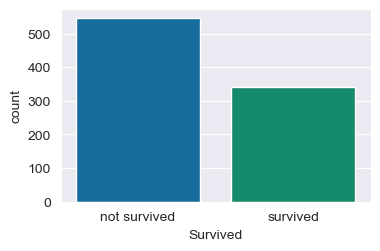

In [60]:
sns.countplot(data=titanic, x='Survived'); #NOTE: no need to do counting of individual elements before plotting with seaborn...
# ... unlike matplotlib manual counting + already LABELS INCLUDED

Note:
* You can also use `sns.boxplot()`, but `sns.countplot()` does the counting for you whereas `sns.boxplot()` does not
* Labels for y and x-axis are set automatically!

## Distribution for quantitative variables: Histogram 

Use [`sns.displot()`](https://seaborn.pydata.org/generated/seaborn.displot.html) to create a histogram or a density plot.
* Histogram example (Age of Titanic passengers):

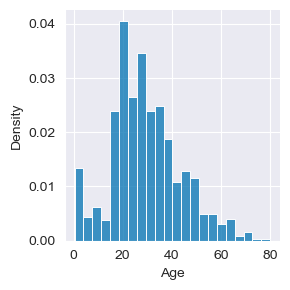

In [61]:
sns.displot(titanic, x='Age', stat='density', 
            height=3); # height for the height of the plot, but no need to set --> seaborn will adjust automatically most of the time anyway

## Distribution for quantitative variables: Density plot

To create a density plot, provide an additional argument `kind='kde'` to `sns.displot()`. 
* Example (Age of Titanic passengers):

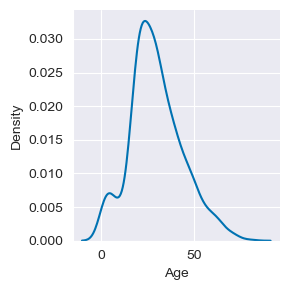

In [63]:
sns.displot(titanic, x='Age', kind='kde', height = 3);

## Overlapping histogram / density plot

To create an overlapping histogram / density plot, provide additional argument `hue` to specify which categorical variable the distribution should be conditional on. 
* Example (Age of Titanic passengers from different ticket classes):

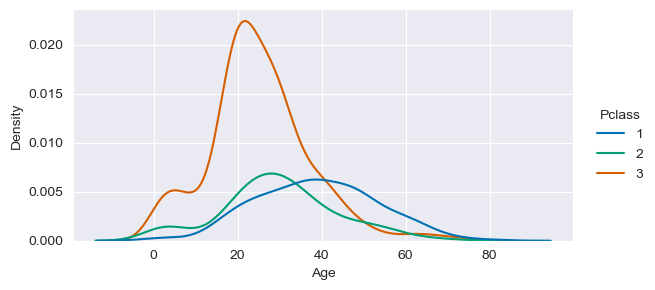

In [41]:
sns.displot(data=titanic, x='Age', kind='kde', hue='Pclass', height=3, 
            aspect=2); # aspect for the width of the ploth

Do you remember what `hue` is? --> Colour patterns covered in week 2

## Side-by-side histogram  / density plot

Provide additional argument `row` and/or `col` to specify which categorical variable the distribution in the rows / columns should be conditional on. 
* Example (Age of Titanic passengers from different ticket classes):

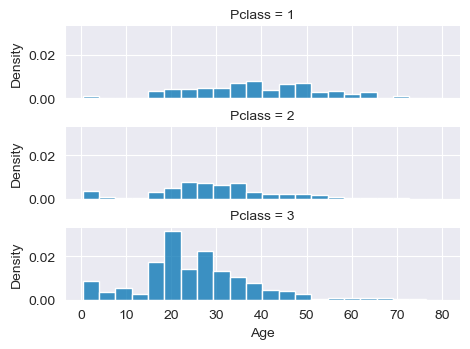

In [69]:
sns.displot(data=titanic, x='Age', row='Pclass', stat='density', height=1.2, aspect=4) #NOTE: row is equivalent to hue above, but we don't want...
# ...overlay this time, so settle for row instead
plt.subplots_adjust(hspace=0.4); # to reduce space between the subplots

## Compare distributions using `sns.catplot()`

[`sns.catplot()`](https://seaborn.pydata.org/generated/seaborn.catplot.html) helps to show the relationship between a numerical and one or more categorical variables.
* Use `kind=` to specify the type of plots to use

## Compare distributions: bar chart

To create side-by-side bar chart, use `kind='bar'` in `sns.catplot()`.
* Example (Number of survival for different ticket classes):

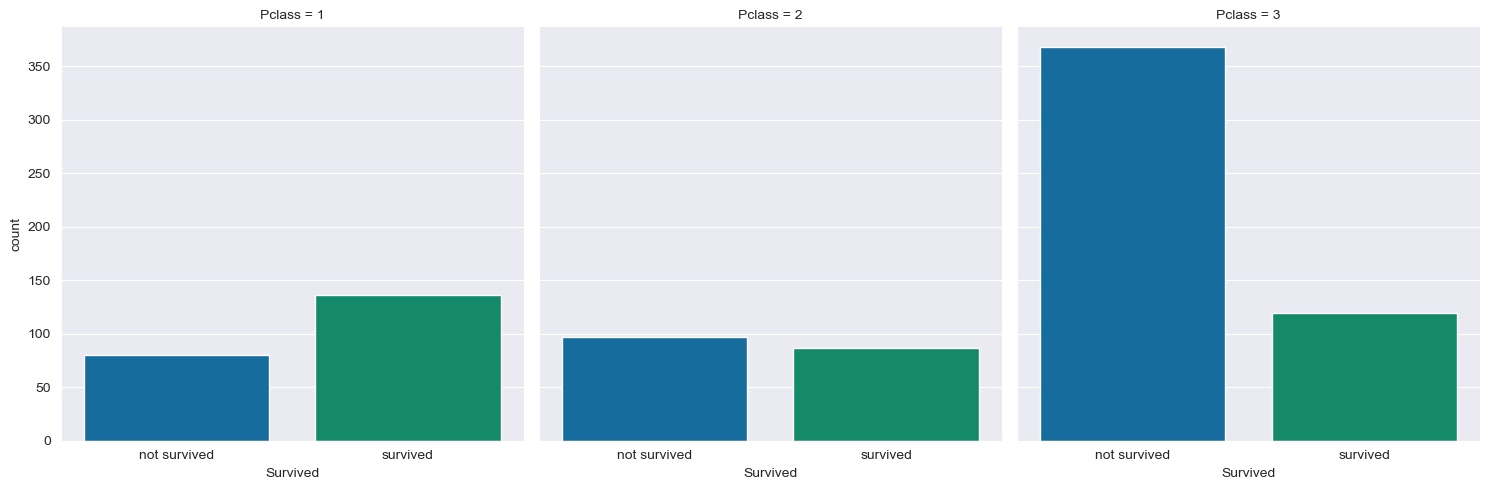

In [43]:
sns.catplot(data=titanic, x='Survived', col='Pclass', kind='count'); #count plot is a bar chart

## Compare distributions: bar chart (continue)

Alternatively, one can add additional argument `hue` to `sns.countplot()`.
* Example (Number of survival for different ticket classes):

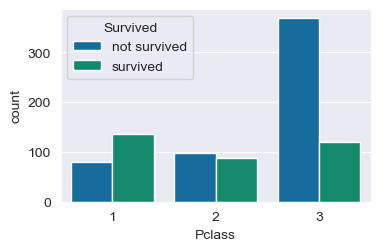

In [44]:
sns.countplot(data=titanic, x='Pclass', hue='Survived');

## Compare distributions: boxplot

To create side-by-side bar chart, use `kind='box'` in `sns.catplot()`.
* Example (Age of Titanic passengers with different ticket classes):

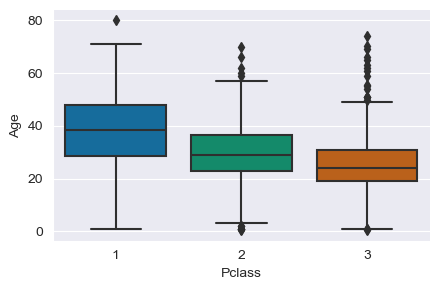

In [45]:
sns.catplot(data=titanic, x='Pclass', y='Age', kind='box', height=3, aspect=1.5);

One can create a very similar plot using `sns.boxplot()`.


## Compare distributions: Violin plot

To create side-by-side violin plot, use `kind='violin'` in `sns.catplot()`.
* Example (Age of Titanic passengers with different ticket classes):

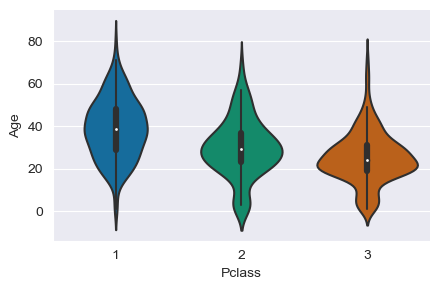

In [46]:
sns.catplot(data=titanic, x='Pclass', y='Age', kind='violin', height=3, aspect=1.5);

One can create a very similar plot using `sns.violinplot()`.

## Violin plot: one more categorical variable

Provide an additional argument `hue` to show one more categorical variable. 

* Example (Age of Titanic passengers with different ticket classes and gender):

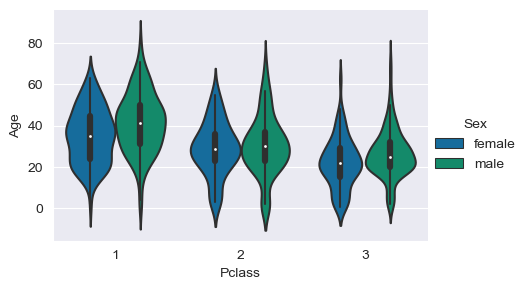

In [47]:
sns.catplot(data=titanic, x='Pclass', y='Age', kind='violin', hue='Sex', 
            height=3, aspect=1.5);

## Split violin plot

Use `split=True` to get a split violin plot. 
* Example (Age of Titanic passengers with different ticket classes and gender):

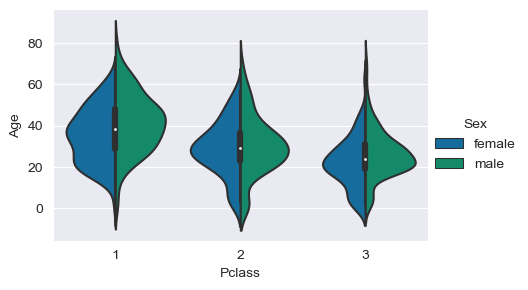

In [48]:
sns.catplot(data=titanic, x='Pclass', y='Age', kind='violin', hue='Sex', 
            split=True, height=3, aspect=1.5);

## Relations between a pair of quantitative variables: scatter plot
 
Use [`sns.relplot()`](https://seaborn.pydata.org/generated/seaborn.relplot.html) to create a scatter plot. 

* Example (Displacement vs mpg from the auto dataset):

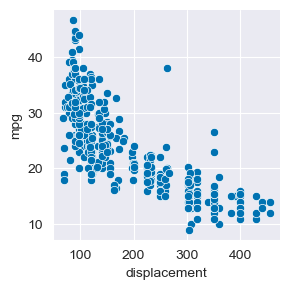

In [49]:
sns.relplot(data=auto, x='displacement', y='mpg', height=3);

One can create a very similar plot using `sns.scatterplot()`.

## Scatter plot: more than 2 variables

Specify `hue`, `size` and/or `style` to show more variables on a scatter plot. 
* Example (Displacement vs mpg from the auto dataset):

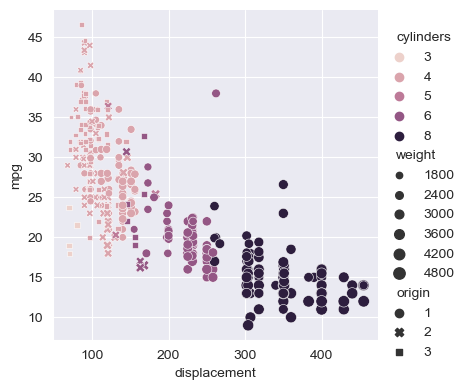

In [50]:
g = sns.relplot(data=auto, x='displacement', y='mpg', hue='cylinders', size='weight', 
                style='origin', height=4)

## Scatter plot: with marginal distribution

Use [`sns.jointplot()`](https://seaborn.pydata.org/generated/seaborn.jointplot.html) if you want to visualise both the marginal and join distribution.

* Example (Displacement vs mpg from the auto dataset):

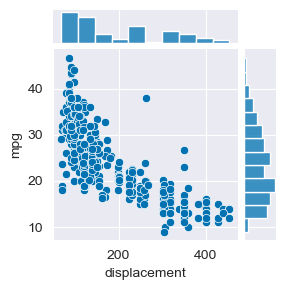

In [51]:
sns.jointplot(data=auto, x='displacement', y='mpg', height=3);

## Hex plot

To create a hex plot, provide an additional argument `kind='hex'` to [`sns.jointplot()`](https://seaborn.pydata.org/generated/seaborn.jointplot.html). 
* Example (Displacement vs mpg from the auto dataset):

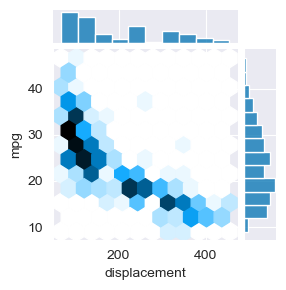

In [52]:
sns.jointplot(data=auto, x='displacement', y='mpg', kind='hex', height=3);

## Contour plot

To create a contour plot, provide an additional argument `kind='kde'` to [`sns.jointplot()`](https://seaborn.pydata.org/generated/seaborn.jointplot.html). 
* Example (Displacement vs mpg from the auto dataset):

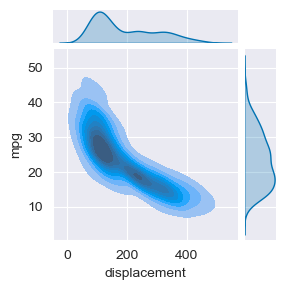

In [53]:
sns.jointplot(data=auto, x='displacement', y='mpg', kind='kde', fill=True, height=3);

## Scatter plot matrix

Use [`sns.pairplot()`](https://seaborn.pydata.org/generated/seaborn.pairplot.html) to create scatter plot matrix. 
* Example (Auto dataset):

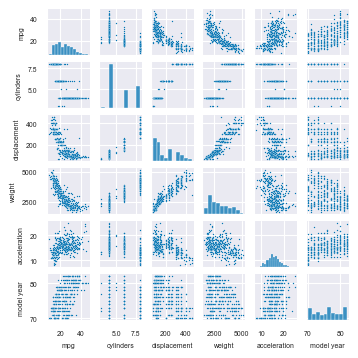

In [54]:
with sns.plotting_context(rc={"axes.labelsize": 5, "xtick.labelsize": 5, 
                              "ytick.labelsize": 5}): # control label sizes
    sns.pairplot(data=auto, height=0.6, plot_kws={"s": 1}); # pt size 1

## Line plot

`sns.relplot()` (with `kind=line`) can also be used to create line plots.
* Example (number of covid cases and deaths):

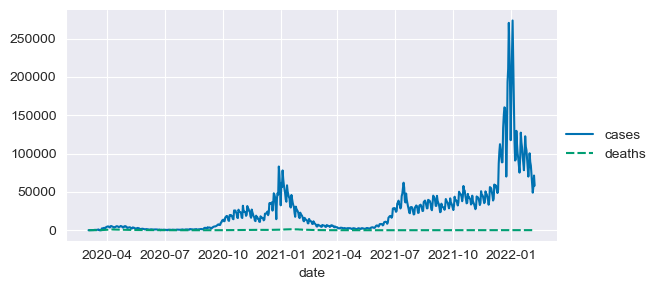

In [55]:
sns.relplot(data=covid, kind='line', height=3, aspect=2);

## Line plot: side-by-side

`sns.relplot()` can be used to create side-by-side line plots if the data is in long format.
* Example (number of covid cases and deaths):

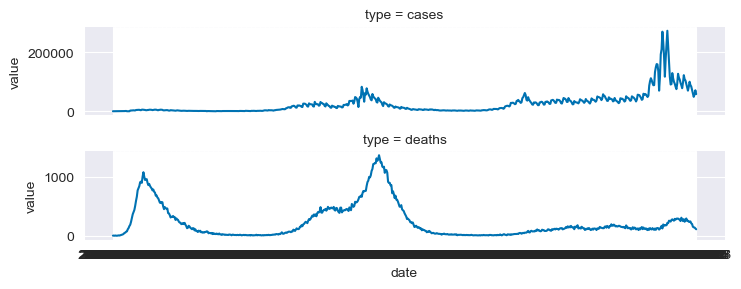

In [70]:
covid_long = pd.melt(covid, ignore_index=False, var_name='type').reset_index()
sns.relplot(data=covid_long, x='date', y='value', row='type', kind='line',
            facet_kws={'sharey': False, 'sharex': True}, height=1.5, aspect=5);
#ALWAYS much easier to use long vs short data here, as may need to go back to use maplotlib when wide data

## Line plot: side-by-side

With wide data, use `plt.subplots()` with `sns.lineplot()` for a side-by-side line plot.
* Example (covid number of cases and deaths):

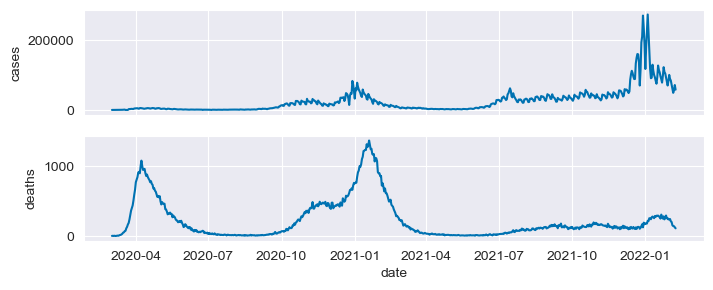

In [57]:
fig, ax = plt.subplots(2, figsize=(8, 3), sharex=True)
sns.lineplot(covid.cases, ax=ax[0])
sns.lineplot(covid.deaths, ax=ax[1]);

## `seaborn` takeaway

It is easy to use `seaborn` to plot:
* Bar chart to show frequency - no need to do the counting by ourselves!
* Side-by-side plot
    * using `sns.relplot()` or `sns.catplot()`
    * using additional arguments like `hue`
    
But for some plots like stacked bar charts or side-by-side line plots from wide data, it may be easier to make use of plotting functionalities from Pandas instead.

## Activity 4.2.1

For the `DataFrame` `datasaurus` below (created using the data from [here](https://www.autodesk.com/research/publications/same-stats-different-graphs)), do the following:
1. Calculate the mean, variance and correlation for the variables x and y with the dataset "dino" and "away". What do you observe?
2. Create the scatter plots for the variables x and y for dataset "dino" and "away". What do you observe?

In [76]:
datasaurus = pd.read_csv('data/SameStatsDataAndImages/datasets/DatasaurusDozen.tsv',
                         delimiter='\t')

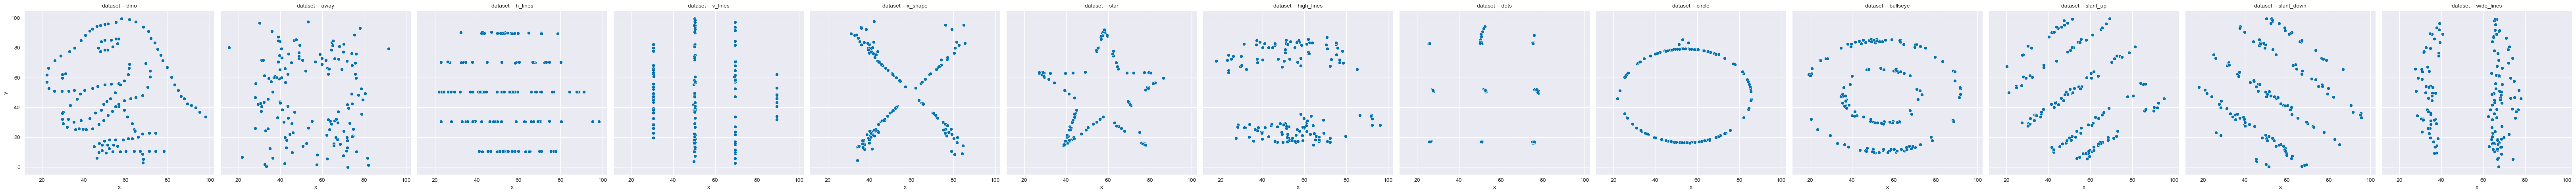

In [98]:
datasaurus.groupby("dataset").mean()
#datasaurus.loc[(datasaurus["dataset"] == "dino") | (datasaurus["dataset"] == "away")]
selected_data = datasaurus[datasaurus.dataset.isin(["dino", "away"])]
#datasaurus.groupby("dataset").var()
#datasaurus.groupby("dataset").mean()

selected_data.groupby("dataset").agg(["mean", "std"]) #best way to prevent us from rewriting the code separately
selected_data.groupby("dataset").corr()

sns.relplot(selected_data, x = "x", y= "y", col = "dataset");
#sns.relplot(datasaurus, x = "x", y= "y", col = "dataset");

## Activity 4.2.2

Use the `DataFrame` `dc` below to show the following via visualisation using `seaborn`:
1. The total number of characters by gender
2. The total number of characters with different alignments by gender 
2. How the number of female characters and male characters introduced is changed over time

Please make sure that:
* Appropriate types of plots are selected based on the types of data
* Plots are easy to read by labelling the plots, making sure labels are not overlapping, etc.

In [100]:
dc = pd.read_csv('data/dc-wikia-data.csv')
dc['SEX'] = dc['SEX'].str.split().str[0]
dc['ALIGN'] = dc['ALIGN'].str.split().str[0]
dc = dc[(dc['YEAR'].between(2000,2011)) & (dc['SEX'].isin(['Male', 'Female']))]

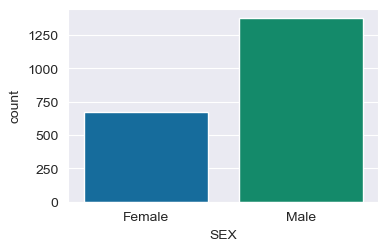

In [105]:
#Part 1:
#sns.countplot(dc, x = "SEX");
#Part 2:
sns.countplot(dc, x = "SEX", hue = "ALIGN");

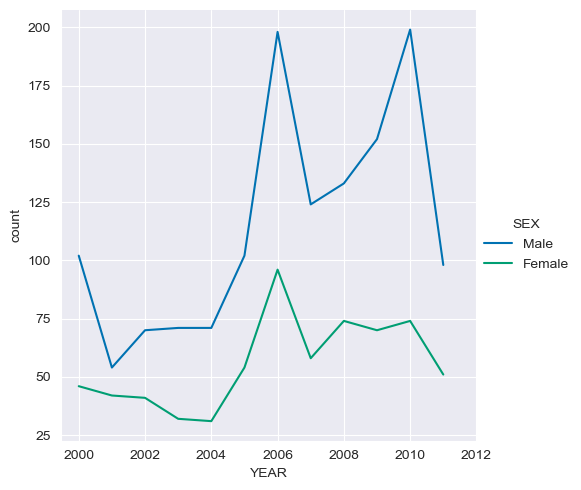

In [115]:
import numpy as np
#Part 3:
sex_count = dc.value_counts(["SEX", "YEAR"]).reset_index().rename(columns={0:"count"}) #so that the last column is not called '0' 
#to get the data to be long; we reset the index for a normal dataframe (because multiindex otherwise)
sns.relplot(sex_count, x = "YEAR", y = "count", hue = "SEX", kind = "line"); #change hue to col if you want 2 different, separate graphs
plt.xticks(np.arange(2000, 2013, 2)); #just one of the ways to add the extra label for 2013 --> ask dad/explore other ways to do this!!
#NOTE: the numpy array that we change in order to introduce the dates directly feeds back into the plot because we use plt., and everything in this plot...
#...works with plt directly (as it would continue to, unless we introduce subplots; in that case, we'll have to introduce these directly into the subplots)

# Plotting with `Pandas`

## Plotting with `Pandas`

`Pandas` provides different plot functions to make it easier to create matplotlib plots using `pd.DataFrame` and `pd.Series`. 
* Some plots are easier to create using Pandas. For example:
    * Stacked bar chart
    * Side-by-side line plots using wide data

Note in the workshop we only provide a brief demo on how to use `Pandas` to plot. See [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html) to learn more.

## Plotting with `Pandas`: bar chart

Use [`plot.bar()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html) to create a bar chart.
* Example (Survival of Titanic passengers):

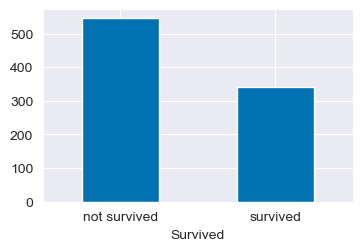

In [116]:
# rot controls how the tick labels are rotated
titanic.value_counts('Survived').plot.bar(rot=0); 

Note with `pandas`, like `matplotlib`, we need to first do the counting.

## Bar chart: side-by-side / stacked

We can create a side-by-side / stacked bar chart by having the index and columns of the data frame to represent the categories.
* Example (Survival of Titanic passengers with different ticket classes): 

In [117]:
survived = titanic.pivot_table(index='Pclass', columns='Survived', aggfunc='size')
survived

Survived,not survived,survived
Pclass,,
1,80,136
2,97,87
3,368,119


## Bar chart: side-by-side / stacked (easiest to do stacked graphs with pandas BUT remember that the syntax is quite different for pandas --> we have ax[0] and stuff and also df.something)

* Example (Survival of Titanic passengers with different ticket classes): 

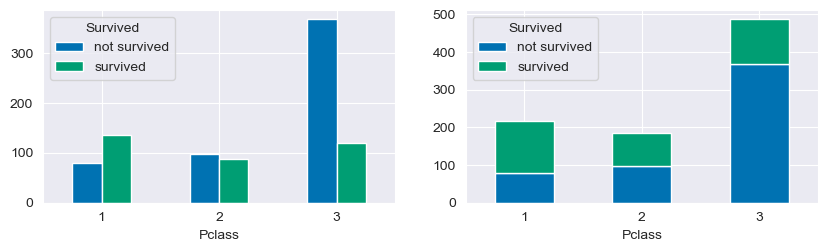

In [118]:
_, ax = plt.subplots(1,2, figsize=(10, 2.5))
survived.plot.bar(rot=0, ax=ax[0])
survived.plot.bar(rot=0, ax=ax[1], stacked=True); #notice auto legends and axes, so MUCH better than matplotlib

To create a stacked bar chart, provide an additional argument `stacked=True`.

## Plotting with `Pandas`: Histogram

Use [`hist()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.hist.html) to create histogram.
* Example (Age of Titanic's passengers):

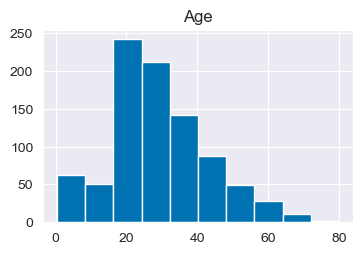

In [65]:
titanic.hist(column='Age');

## Histogram: side-by-side

Provide an additional argument `by` to specify the categorical variable to condition on.
* Example (Age of Titanic's passengers with different ticket classes):

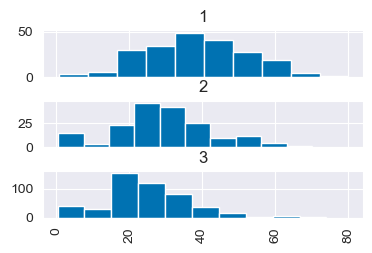

In [66]:
titanic.hist(column='Age', by='Pclass', layout=(3,1), sharex=True);

## Plotting with Pandas: box plot

Use [`boxplot()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html) to create a boxplot. One can provide an additional argument `column` to select the column to plot, or use `by` to create a side-by-side box plot.
* Example (Titanic's passengers):

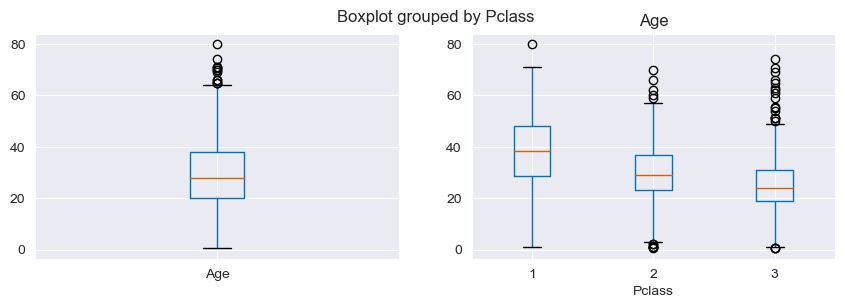

In [67]:
fig, ax = plt.subplots(1,2, figsize=(10, 3))
titanic.boxplot(column='Age', ax=ax[0])
titanic.boxplot(column='Age', by='Pclass', ax=ax[1]);

## Plotting with Pandas: scatter plot

Use [`plot.scatter()`](https://pandas.pydata.org/pandas-docs/version/0.25.0/reference/api/pandas.DataFrame.plot.scatter.html) with additional argument `s` to control the size, and `c` to control the colour of the markers.
* Example (Displacement vs mpg from the auto dataset):

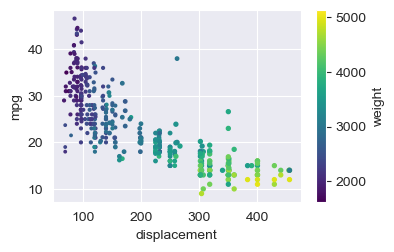

In [68]:
auto.plot.scatter(x='displacement', y='mpg', s='cylinders', c='weight', 
                  colormap='viridis');

## Hex plot

Use [`plot.hexbin()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.hexbin.html) to create hex plot.
* Example (Displacement vs mpg from the auto dataset):

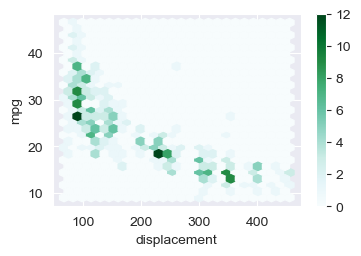

In [119]:
auto.plot.hexbin(x='displacement', y='mpg', gridsize=25);

## Scatter matrix

Use [`pd.plotting.scatter_matrix()`](https://pandas.pydata.org/docs/reference/api/pandas.plotting.scatter_matrix.html) to create scatter matrix. Example (auto dataset):

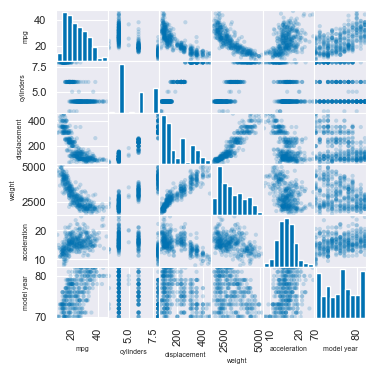

In [70]:
axes = pd.plotting.scatter_matrix(auto, alpha=0.2, figsize=(4,4))
for ax in axes.ravel():
    ax.set_xlabel(ax.get_xlabel(), fontsize=5) # reduce label size to prevent overlapping
    ax.set_ylabel(ax.get_ylabel(), fontsize=5)

## Plotting with Pandas: line plot

By default, Pandas use a line plot to visualise the data. 
* Example (Number of covid cases and deaths over time):

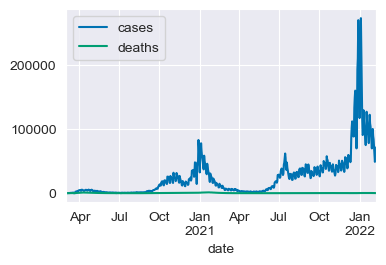

In [71]:
covid.plot();

If there are multiple columns, Pandas tries to plot each column as each line on the plot.

## Plotting with Pandas: subplots

To plot at separate subplots, use `subplots=True`. For example:

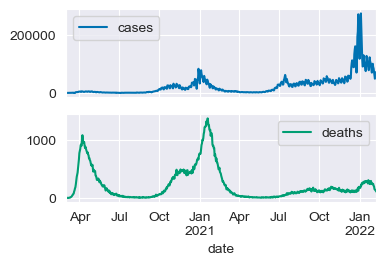

In [72]:
covid.plot(subplots=True);

## `Pandas` takeaway

It is easy to use `Pandas` to plot:
* Stacked bar chart
* Side-by-side plot
    * using additional arguments like `by` and `subplots`
    
But for some plots like density plots, it may be easier to create them via `seaborn`.

## Activity 4.3

Repeat Activity 4.2.2 but this time we use `Pandas`.
* Which plots are easier to create using `Pandas`? Which one is easier to create using `seaborn`?

## Activity 4.2.2

Use the `DataFrame` `dc` below to show the following via visualisation using `pandas`:
1. The total number of characters by gender
2. The total number of characters with different alignments by gender 
2. How the number of female characters and male characters introduced is changed over time

Please make sure that:
* Appropriate types of plots are selected based on the types of data
* Plots are easy to read by labelling the plots, making sure labels are not overlapping, etc.

In [120]:
dc = pd.read_csv('data/dc-wikia-data.csv')
dc['SEX'] = dc['SEX'].str.split().str[0]
dc['ALIGN'] = dc['ALIGN'].str.split().str[0]
dc = dc[(dc['YEAR'].between(2000,2011)) & (dc['SEX'].isin(['Male', 'Female']))]

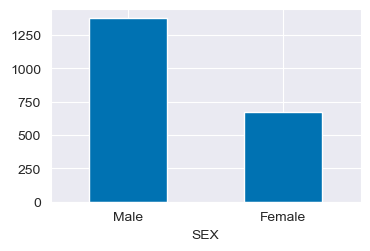

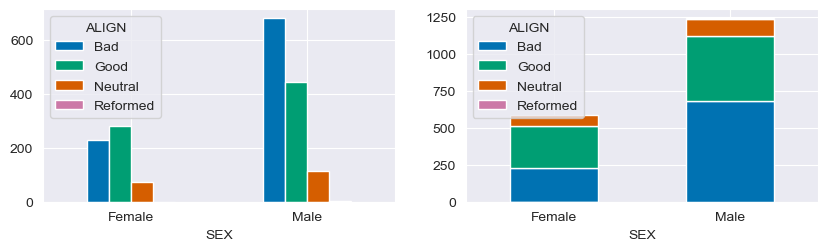

In [126]:
dc.value_counts('SEX').plot.bar(rot=0)

sex_alignment = dc.pivot_table(index='SEX', columns='ALIGN', aggfunc='size')
_, ax = plt.subplots(1,2, figsize=(10, 2.5))
sex_alignment.plot.bar(rot=0, ax=ax[0])
sex_alignment.plot.bar(rot=0, ax=ax[1], stacked=True);
#dc.value_counts('ALIGN').plot.bar(rot=0);

TypeError: <pandas.plotting._core.PlotAccessor object at 0x000001DF76BB6A10> got multiple values for keyword argument 'kind'

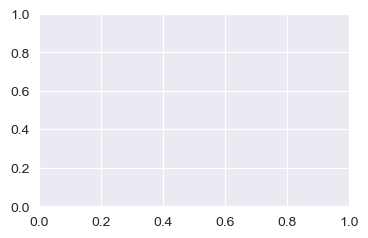

In [141]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'dc' is your DataFrame
sex_count = dc.value_counts(["SEX", "YEAR"]).reset_index().rename(columns={0: "count"})

# Plotting using Pandas
fig, ax = plt.subplots()
for sex, data in sex_count.groupby('SEX'):
    data.plot.scatter(x='YEAR', y='count', kind='line', label=sex, ax=ax)

plt.xticks(np.arange(2000, 2013, 2))
plt.legend(title='SEX')
plt.show()

## Summary

* Data visualisation in Python
    * Matplotlib
    * Seaborn
    * Pandas

## Next step

* Problem set 4: due next Thursday 12pm noon
* Visit the python code on the lecture slides
* Readings:
    * [Matplotlib tutorial](https://matplotlib.org/stable/tutorials/introductory/usage.html#sphx-glr-tutorials-introductory-usage-py)
    * [Seaborn tutorial](https://seaborn.pydata.org/tutorial.html): Plotting functions
    * [Pandas visualisation tutorial](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html)
    * Data Visualization Fundamentals part of the [Python pre-sessional course](https://moodle.lse.ac.uk/course/view.php?id=7696)